In [61]:
# Read pdf pages 125:135 and convert them into text
library(pdftools)
readpage<- pdf_convert('M:\\Imarticus\\ProjectR\\Text mining\\Datafiles\\vsosports.pdf',
                      pages=125:135)
text<- tesseract::ocr(readpage)


Converting page 125 to vsosports_125.png... done!
Converting page 126 to vsosports_126.png... done!
Converting page 127 to vsosports_127.png... done!
Converting page 128 to vsosports_128.png... done!
Converting page 129 to vsosports_129.png... done!
Converting page 130 to vsosports_130.png... done!
Converting page 131 to vsosports_131.png... done!
Converting page 132 to vsosports_132.png... done!
Converting page 133 to vsosports_133.png... done!
Converting page 134 to vsosports_134.png... done!
Converting page 135 to vsosports_135.png... done!


In [63]:
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")
library(tidytext)
library(dplyr)
data(stop_words)

In [64]:
# clean text using stringr
library(stringr)
# Remove alphanumeric characters & punctuation
textnew<- str_replace_all(text, "[[:punct:]]", " ")
textnew<-str_replace_all(textnew, "[^[:alnum:]]", " ")

In [65]:
var <- Corpus(VectorSource(textnew))

# Convert the text to lower case
var <- tm_map(var, content_transformer(tolower))
# Remove numbers
var <- tm_map(var, removeNumbers)
# Remove english common stopwords
var <- tm_map(var, removeWords, stopwords("english"))
# Remove your own stop word
var <- tm_map(var, removeWords,c("ofthe","tothe","tomake" ,"atthe","forthe","bal","ine",
               "fot"))
# Eliminate extra white spaces
var <- tm_map(var, stripWhitespace)

Warning message in tm_map.SimpleCorpus(var, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, removeWords, c("ofthe", "tothe", "tomake", :
"transformation drops documents"Warning message in tm_map.SimpleCorpus(var, stripWhitespace):
"transformation drops documents"

In [66]:
dtm <- TermDocumentMatrix(var)
matrix <- as.matrix(dtm)
sorted_sum <- sort(rowSums(matrix),decreasing=TRUE)
table <- data.frame(word = names(sorted_sum ),freq=sorted_sum )
table <- table %>% anti_join(stop_words)

Joining, by = "word"
Warning message:
"Column `word` joining factor and character vector, coercing into character vector"

In [67]:
#top 50 words
top50_words<-head(table,50)
top50_words

word,freq
ball,28
students,26
shot,18
batter,16
post,13
equipment,10
foot,10
team,9
distance,9
putting,9


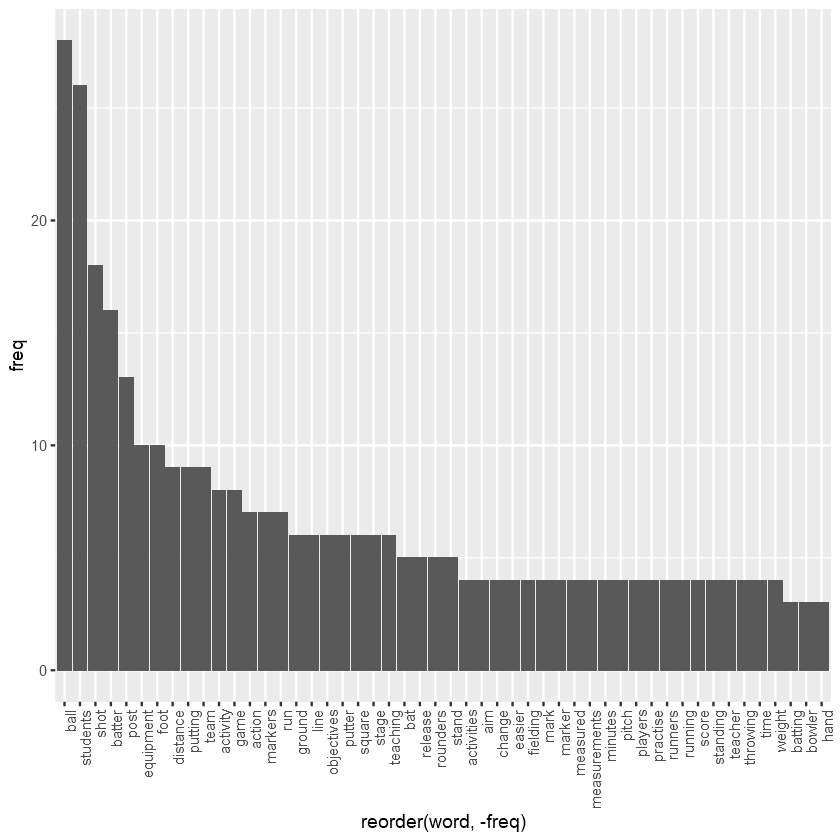

In [68]:
#word frequency plot
library(ggplot2)
ggplot(top50_words, aes(x= reorder(word, -freq), y = freq)) +
  geom_bar(stat = "identity")+ 
 theme(axis.text.x=element_text(angle=90, hjust=1))

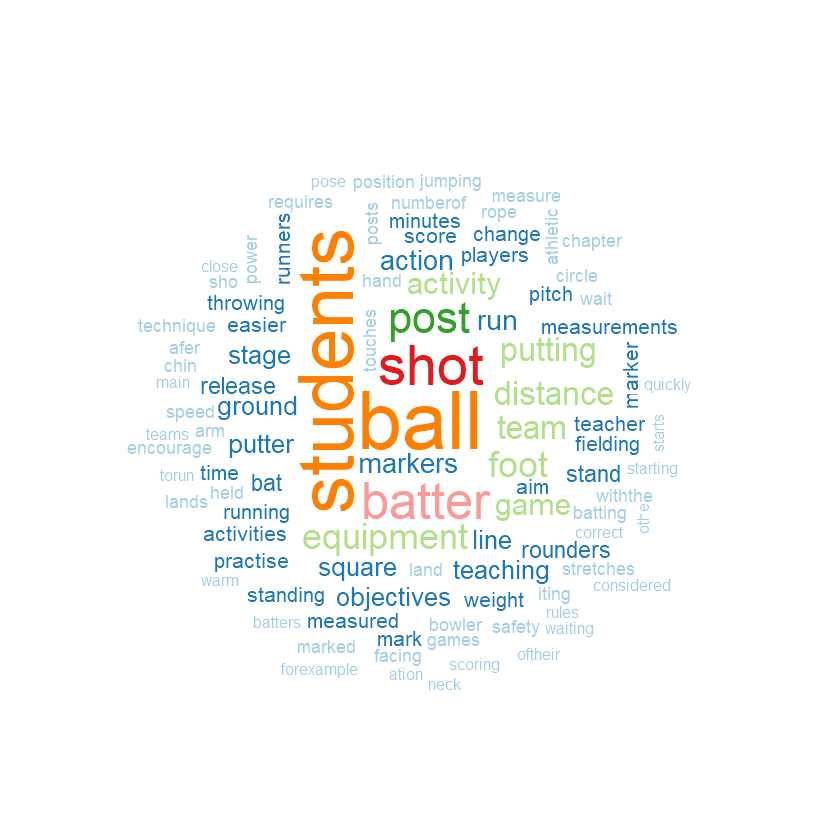

In [69]:
#wordcloud
set.seed(1234)
wordcloud(words = table$word, freq = table$freq, min.freq = 1,
          max.words=100, random.order=FALSE, 
          colors=brewer.pal(8, "Paired"))

In [70]:
top25_words<-head(table,25)
library(igraph)

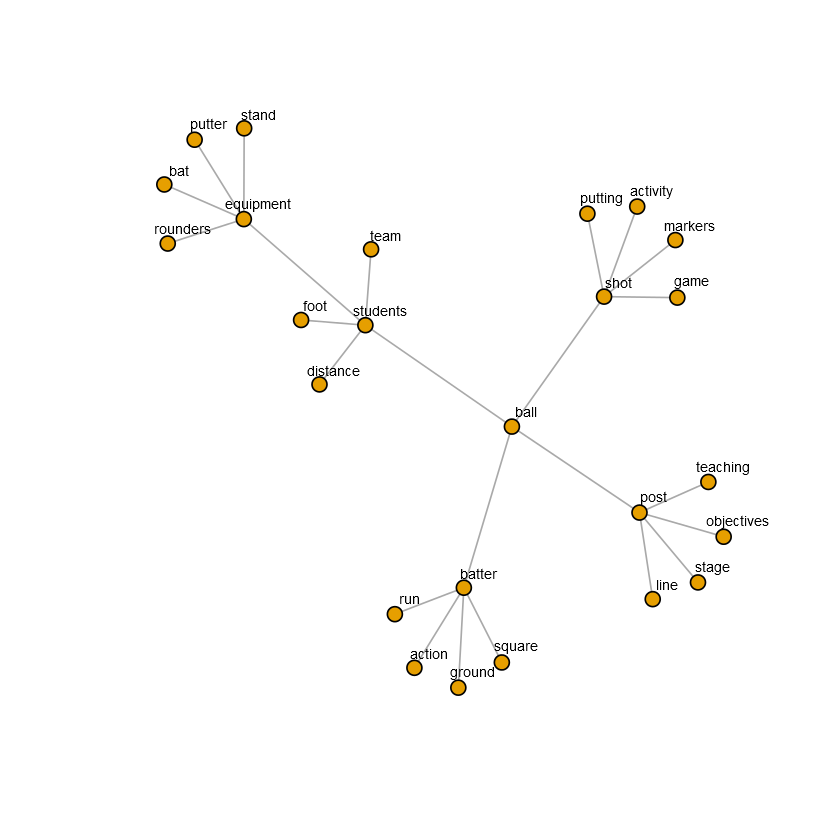

In [71]:
tr <- make_tree(25, children =4, mode = "undirected")

plot(tr, vertex.size=5, vertex.label=top20_words$word,
     vertex.label.dist=1,vertex.label.color="black", vertex.label.cex=0.7) 

In [72]:
net_graph=data.frame(table)

In [73]:
net_graph=net_graph[8:38,]

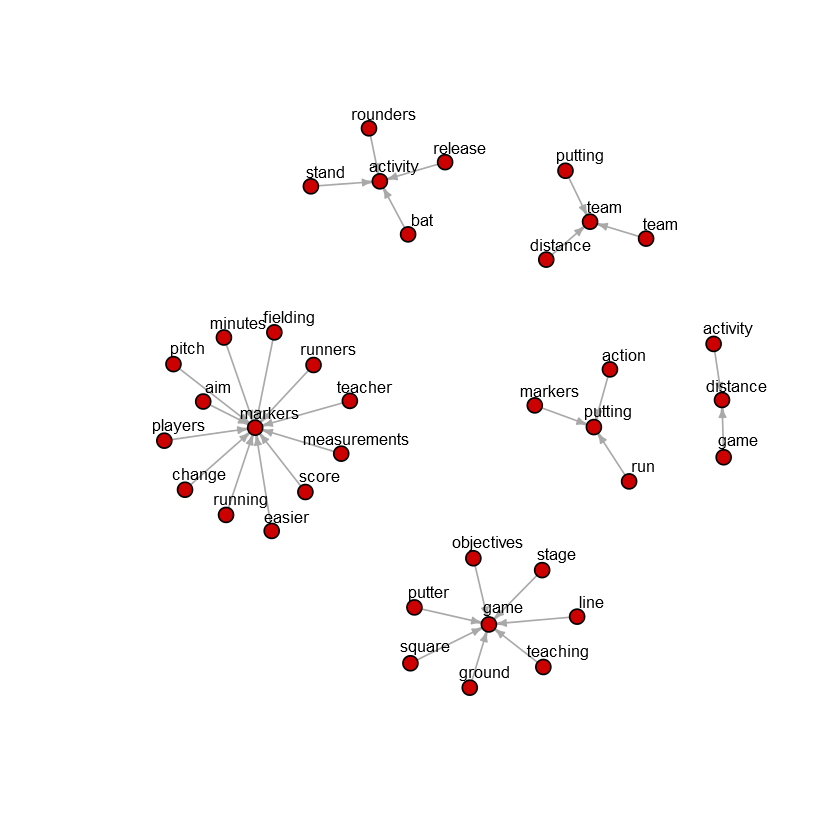

In [76]:
#network plot
net <- graph_from_data_frame(d=net_graph1, directed=T)
plot(net, edge.arrow.size=.4,vertex.label=net_graph1$word,
    vertex.label.dist=1,vertex.label.dist=1,vertex.size=5,edge.arrow.size=.7, 
    vertex.color="red3",vertex.frame.color="black", vertex.label.color="black",
    vertex.label.cex=0.8)